In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import math
from scipy.io import wavfile
import scipy.io.wavfile as wav
from PIL import Image

# Konvoluce s audio signalem

In [4]:
def drawSignal(u, y, fs: int, end_time: float):
    n_start = int(fs * 1.0)
    n_end = int(fs * end_time)
    n = np.arange(n_start, n_end)

    _, axs = plt.subplots(2, 1, figsize=(12, 10))
    plt.subplots_adjust(hspace=0.5)

    axs[0].plot(n / fs, u[n], label='u(n)')
    axs[0].set_xlabel('Time [s]')

    axs[1].plot(n / fs, y[n], label='y(n)')
    axs[1].set_xlabel('Time [s]')

    plt.show()

def generateEchoFilter(sample_rate: int, delay: float, amplitude: float):
    g = np.zeros(int(delay * sample_rate) + 1)
    g[0] = 1.0
    g[sample_rate] = amplitude
    return g

In [5]:
sample_rate, signal = wavfile.read("voice_short.wav")
u = signal.astype(float) / 32768.0

end_time = len(u) / sample_rate
print("Signal duration: %fsec; Sample rate: %d" % (end_time, sample_rate))

Signal duration: 10.439274sec; Sample rate: 44100


<ipython-input-5-a33613a4d817>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read("voice_short.wav")


In [6]:
g = generateEchoFilter(sample_rate, 1.0, 0.5)

In [7]:
y = np.convolve(u, g, mode="full")

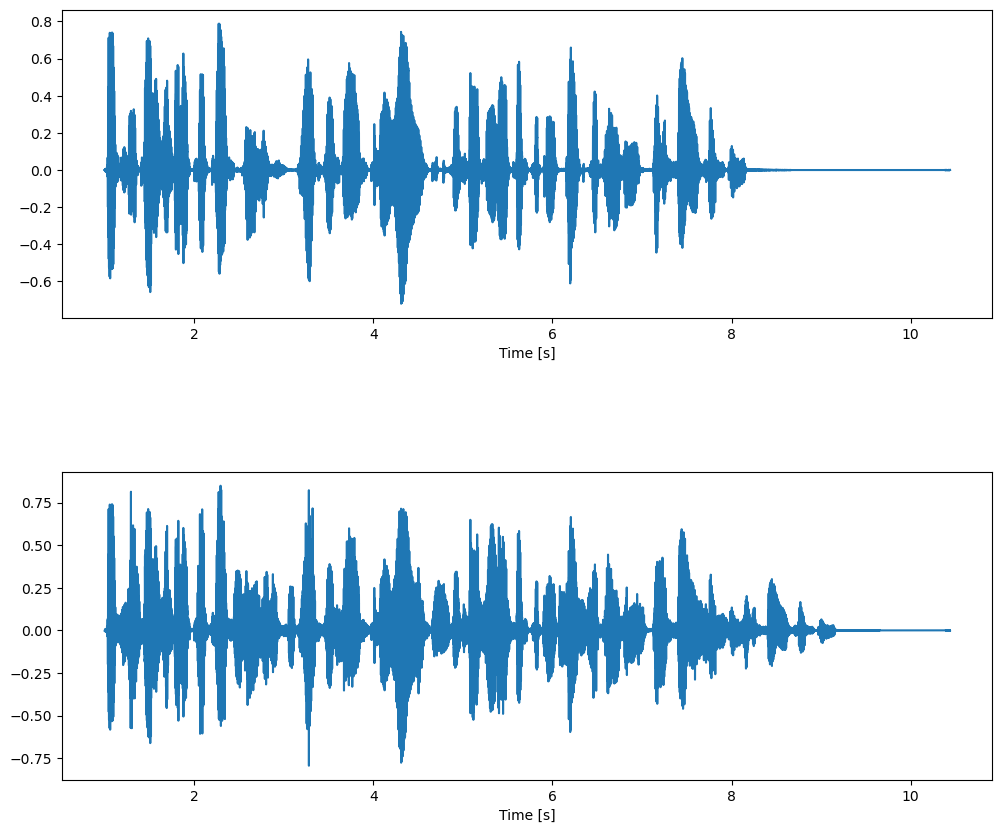

In [8]:
drawSignal(u, y, sample_rate, end_time)

In [9]:
wav.write('voice_short_echo.wav', sample_rate, np.int16(0.5 * y * 32767))

# Konvoluce s obrazem

Puvodni obrazek:


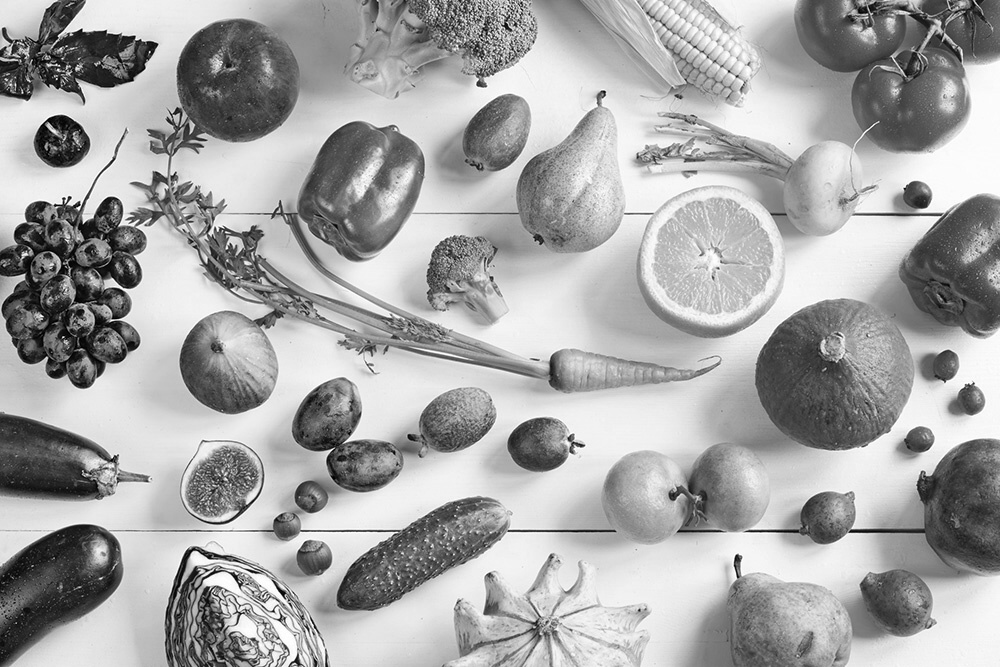

In [10]:
img = Image.open('fruit_grey.jpg').convert('L')
img_array = np.array(img)
print("Puvodni obrazek:")
display(img)

In [11]:
def convolve2d(image, kernel):
    kernel_size = len(kernel)
    kernel_offset = math.ceil(kernel_size/2) - 1
    kernel = np.flipud(np.fliplr(kernel))

    output = np.zeros_like(image)
    for i in range(kernel_offset * 2, image.shape[0] - kernel_offset):
        for j in range(kernel_offset * 2, image.shape[1] - kernel_offset):
            val = np.sum(kernel * image[i - kernel_offset:i + kernel_offset + 1, j - kernel_offset:j + kernel_offset + 1])
            output[i,j] = val

    output = (output - output.min()) / (output.max() - output.min()) * 255
    output = output.astype(np.uint8)

    return output 

Obrazek 1 [h1]:


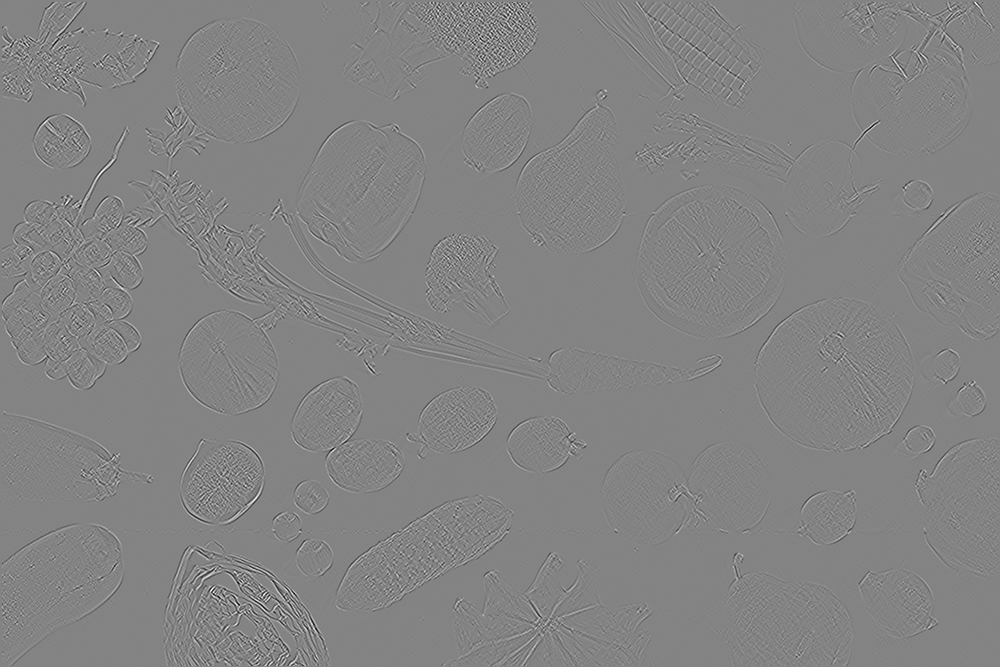

Obrazek 2 [h2]:


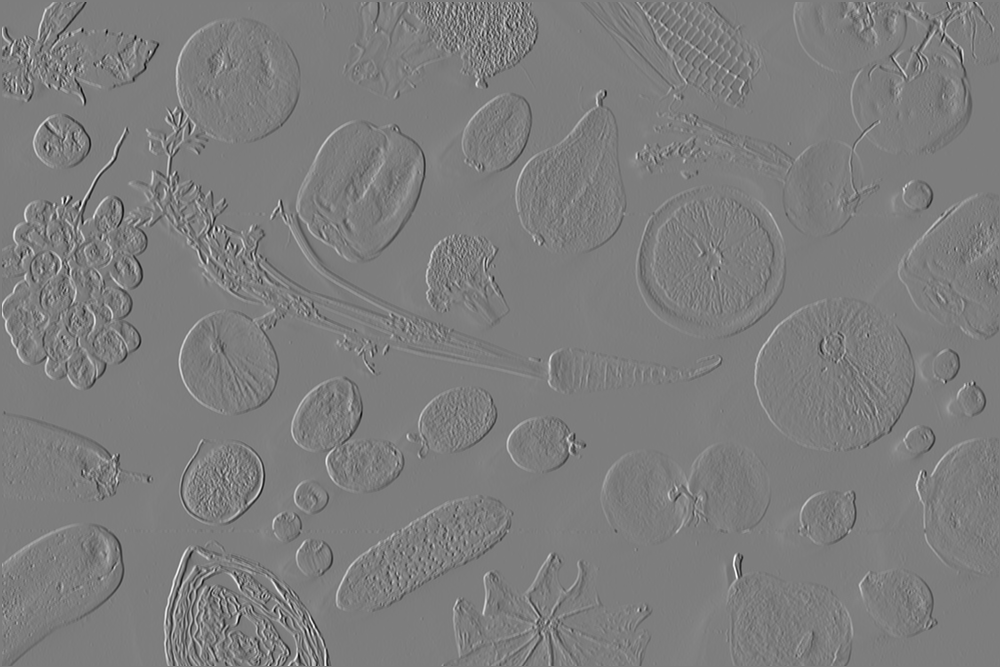

Obrazek 3 [h3]:


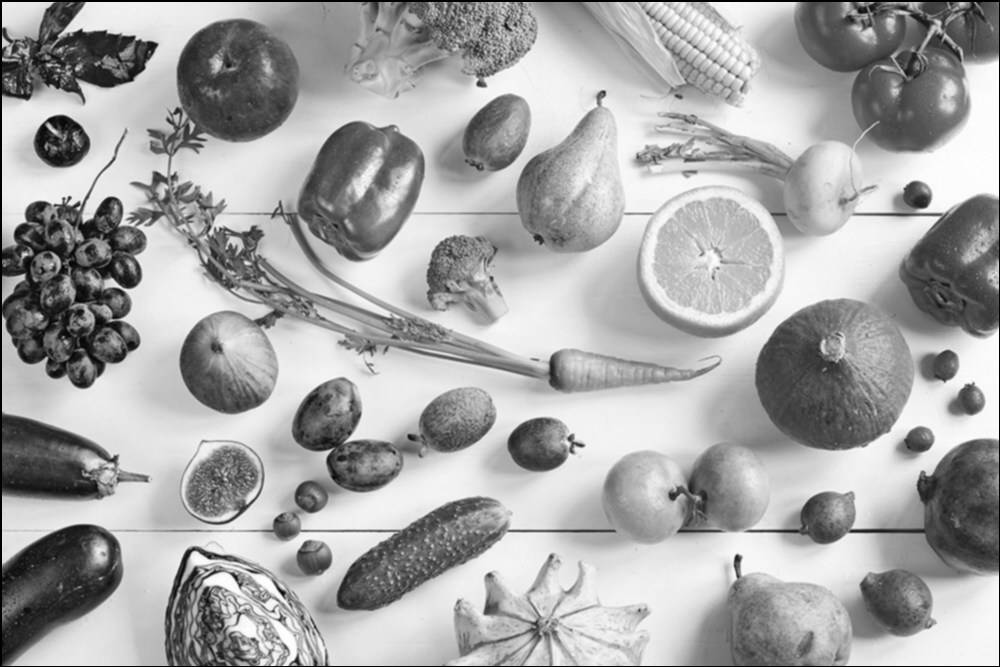

Obrazek 4 [h4]:


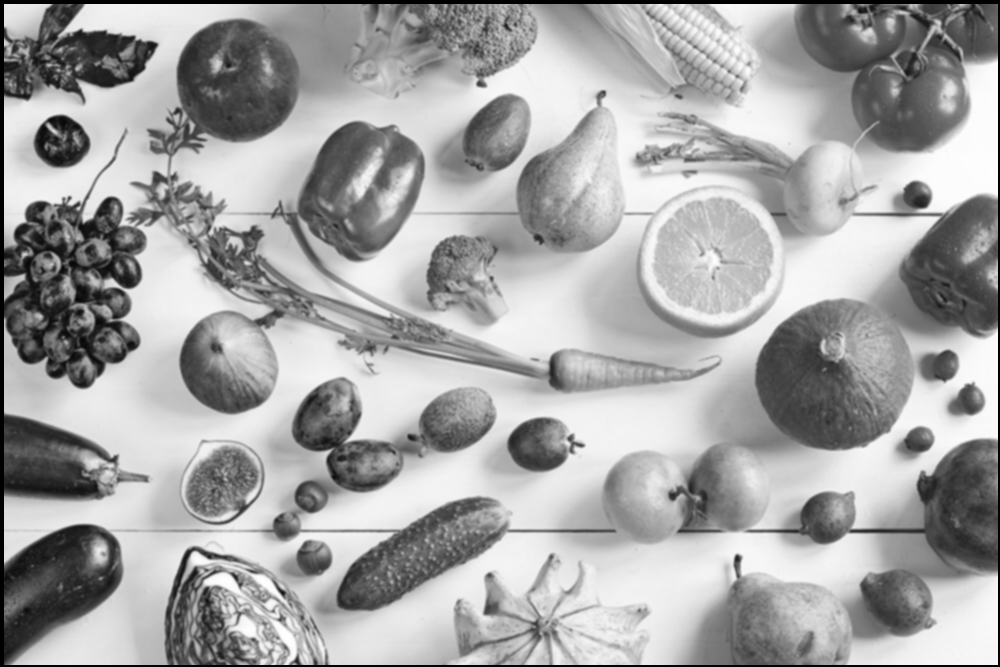

In [12]:
mask_1 = np.array([[1, 0, -1],
                 [0, 0, 0],
                 [-1, 0, 1]]) / 9
img_1 = convolve2d(img_array.astype(float), mask_1)
print("Obrazek 1 [h1]:")
display(Image.fromarray(img_1))

mask_2 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]]) / 9
img_2 = convolve2d(img_array.astype(float), mask_2)
print("Obrazek 2 [h2]:")
display(Image.fromarray(img_2))

mask_3 = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) / 9
img_3 = convolve2d(img_array.astype(float), mask_3)
print("Obrazek 3 [h3]:")
display(Image.fromarray(img_3))

mask_4 = np.array([[1, 4, 6, 4, 1],
                   [4, 16, 24, 16, 4],
                   [6, 24, 36, 24, 6],
                   [4, 16, 24, 16, 4],
                   [1, 4, 6, 4, 1]]) / 25
img_4 = convolve2d(img_array.astype(float), mask_4)
print("Obrazek 4 [h4]:")
display(Image.fromarray(img_4))


# Závěr
Cílem této úlohy byla aplikaci konvoluce na zvukový a obrazový signál.

V první části jsem použil konvoluci k vytvoření efektu ozvěny na zvukovém záznamu "voice_short.wav". Pro tento účel jsem navrhl impulsní odezvu s definovanými parametry (zpoždění 1 sekundy, 0.5 ampliduta ozvěny) a použili ji k provedení konvoluce s původním audio signálem. Poté jsem vytvořený modifikovaný signál s uzvěnou.

V druhé části jsem aplikovali 2D konvoluci na obrazový signál "fruit_grey.jpg". Pro vizualizaci výsledků jsme použili funkce imread a imshow.